In [ ]:
# Part I: Naive Bayes Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_wine
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Task 2: Spam Detection using MultinomialNB
import kagglehub
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset file:", path)


Path to dataset files: C:\Users\omdut\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1


In [22]:
import os

for root, dirs, files in os.walk(path):
    for file in files:
        file_path = os.path.join(root, file)
        print(f"File: {file_path}")


File: C:\Users\omdut\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1\spam.csv


In [30]:
df = pd.read_csv(file_path, encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
# Clean the dataset
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True) 
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})



In [32]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# using CountVectorizer for text feature extraction
vectorizer = CountVectorizer()  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [36]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [37]:
y_pred = model.predict(X_test_vec)

y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print("Confusion Matrix:\n", cm)

Accuracy:  0.9839
Precision: 0.9853
Recall:    0.8933
Confusion Matrix:
 [[963   2]
 [ 16 134]]


In [40]:
#Task 3: GaussianNB with Iris and Wine Datasets

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Features: {iris.feature_names}")
print(f"Classes: {iris.target_names}")

Iris dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [42]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split( X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

X_train_iris.shape, X_test_iris.shape

((105, 4), (45, 4))

In [43]:
# Train GaussianNB classifier
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train_iris, y_train_iris)

,priors,None
,var_smoothing,1e-09


In [44]:
y_pred_iris = gaussian_nb.predict(X_test_iris)

In [45]:
accuracy_nb = accuracy_score(y_test_iris, y_pred_iris)
print(f"\nGaussianNB Results:")
print(f"Accuracy: {accuracy_nb:.4f}")


GaussianNB Results:
Accuracy: 0.9111


In [46]:
# Logistic regression
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train_iris, y_train_iris)
y_pred_iris_lr = lr_classifier.predict(X_test_iris)
accuracy_lr = accuracy_score(y_test_iris, y_pred_iris_lr)

In [47]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_iris, y_train_iris)
y_pred_iris_dt = dt_classifier.predict(X_test_iris)
accuracy_dt = accuracy_score(y_test_iris, y_pred_iris_dt)

In [48]:
print(f"\nModel Comparison on Iris Dataset:")
print(f"GaussianNB Accuracy: {accuracy_nb:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Model Comparison on Iris Dataset:
GaussianNB Accuracy: 0.9111
Logistic Regression Accuracy: 0.9333
Decision Tree Accuracy: 0.9333


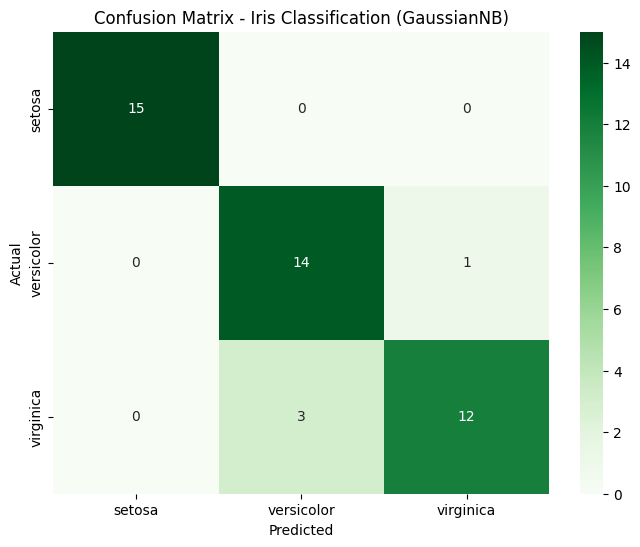

In [49]:
conf_matrix_iris = confusion_matrix(y_test_iris, y_pred_iris)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_iris, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix - Iris Classification (GaussianNB)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()